<a href="https://colab.research.google.com/github/KoshalaChathuranga/ML-Trials/blob/main/IMPORTING%2C_SUMMARIZING%2C_AND_VISUALIZING_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING

In [ ]:
import pandas as pd

In [ ]:
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/'
dataname = 'datasets/iris.csv '
iris = pd.read_csv (urlprefix + dataname)

In [ ]:
iris.head()

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.columns

Index(['rownames', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [ ]:
iris = iris.drop('rownames', axis=1)

In [ ]:
xls = 'http://www.biostatisticien.eu/springeR/nutrition_elderly.xls'
nutri = pd.read_excel(xls)

In [ ]:
nutri.head()

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,151,58,72,4,3,1,4,5,6
1,2,1,1,1,162,60,68,5,2,5,5,1,4
2,2,1,0,4,162,75,78,3,1,5,2,5,4
3,2,1,0,0,154,45,91,0,4,4,0,3,2
4,2,1,2,1,154,50,65,5,3,5,5,3,2


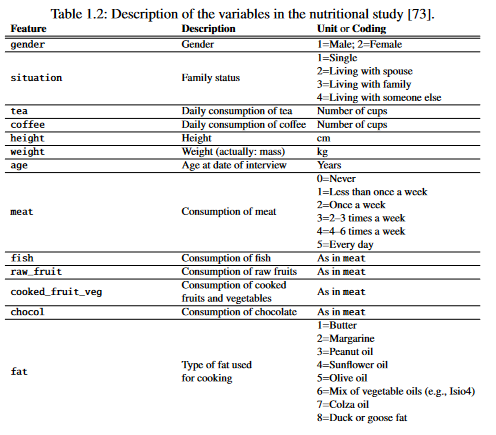

In [ ]:
nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


In [ ]:
DICT = {1: 'Male', 2:'Female'}
nutri['gender'] = nutri['gender'].replace(DICT).astype('category')
nutri['height'] = nutri['height'].astype(float)

In [ ]:
nutri.to_csv('nutri.csv', index = False)

# Summary Tables

In [ ]:
nutri = pd.read_csv('/content/nutri.csv')


In [ ]:
nutri['fat'].describe()

count    226.000000
mean       3.814159
std        1.473009
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: fat, dtype: float64

In [ ]:
nutri['fat'].value_counts()

fat
4    68
3    48
5    40
2    27
6    23
1    15
8     4
7     1
Name: count, dtype: int64

In [ ]:
pd.crosstab(nutri.gender,nutri.situation)

situation,1,2,3
gender,,,
Female,78,56,7
Male,20,63,2


In [46]:
pd.crosstab(nutri.gender,nutri.situation,margins =True)

situation,1,2,3,All
gender,,,,
Female,78,56,7,141
Male,20,63,2,85
All,98,119,9,226


# Summary Statistics

In [ ]:
nutri['height'].mean()

163.96017699115043

In [ ]:
nutri['height'].quantile(q=[0.25,0.5,0.75])

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

In [ ]:
nutri['height'].max()-nutri['height'].min()

48.0

In [ ]:
round(nutri['height'].var(),2)

81.06

In [ ]:
round(nutri['height'].std(),2)

9.0

# Visualizing Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

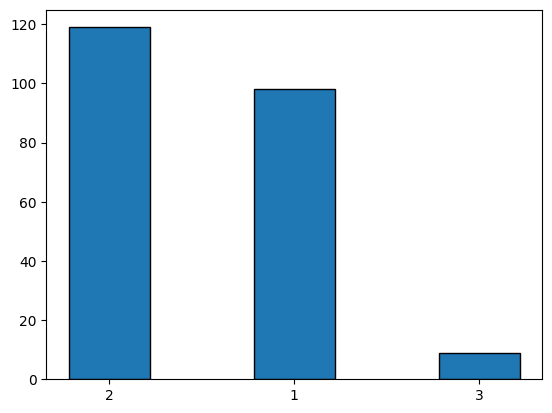

In [ ]:
width = 0.35 # the width of the bars
x = [0, 0.8, 1.6] # the bar positions on x-axis
situation_counts=nutri['situation'].value_counts()
plt.bar(x,situation_counts,width,edgecolor='black')
plt.xticks(x,situation_counts.index)
plt.show()

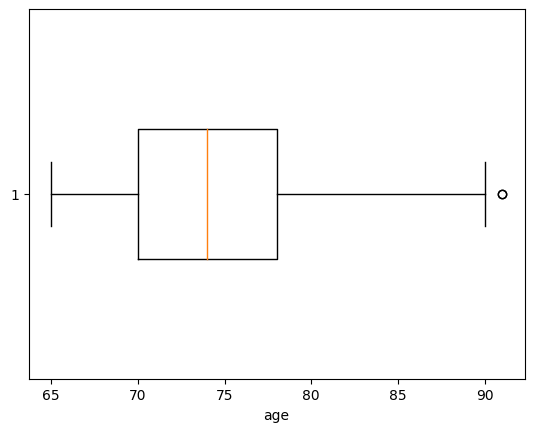

In [ ]:
plt.boxplot(nutri['age'], widths = width, vert = False)
plt.xlabel('age')
plt.show()

# Exercise

In [36]:
!unzip /content/mushroom.zip -d my_folder


Archive:  /content/mushroom.zip
replace my_folder/Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [37]:
mushroom = pd.read_csv('/content/my_folder/agaricus-lepiota.data')

In [38]:
mushroom.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [39]:
num_features = mushroom.shape[1]
print(f"Number of features: {num_features}")

Number of features: 23


In [40]:
feature_info = mushroom.dtypes
print(feature_info)

p      object
x      object
s      object
n      object
t      object
p.1    object
f      object
c      object
n.1    object
k      object
e      object
e.1    object
s.1    object
s.2    object
w      object
w.1    object
p.2    object
w.2    object
o      object
p.3    object
k.1    object
s.3    object
u      object
dtype: object


In [41]:
mushroom.rename(columns = {'p':'edibility',
                       'p.1':'odor'},
            inplace = True)

In [42]:
mushroom['edibility'] = mushroom['edibility'].replace({'e': 'edible', 'p': 'poisonous'})

In [43]:
mushroom['odor'] = mushroom['odor'].replace({'a': 'almond', 'l': 'anise',
                                             'c': 'creosote', 'y': 'fishy',
                                             'f': 'foul', 'm': 'musty',
                                             'n': 'none', 'p': 'pungent',
                                             's': 'spicy',
                                             })


In [44]:
mushroom['odor'].value_counts()

odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      255
creosote     192
musty         36
Name: count, dtype: int64

In [54]:
crosstab = pd.crosstab(mushroom.edibility,mushroom.odor)
crosstab

odor,almond,anise,creosote,fishy,foul,musty,none,pungent,spicy
edibility,,,,,,,,,
edible,400,400,0,0,0,0,3408,0,0
poisonous,0,0,192,576,2160,36,120,255,576


In [60]:
crosstab_ALL = pd.crosstab(mushroom.edibility,mushroom.odor, margins = True)
crosstab_ALL

odor,almond,anise,creosote,fishy,foul,musty,none,pungent,spicy,All
edibility,,,,,,,,,,
edible,400,400,0,0,0,0,3408,0,0,4208
poisonous,0,0,192,576,2160,36,120,255,576,3915
All,400,400,192,576,2160,36,3528,255,576,8123


In [56]:
poisonous_odors = crosstab.columns[crosstab.loc['poisonous'] > 0]

print("Odors to avoid when gathering mushrooms for consumption:")
print(poisonous_odors)

Odors to avoid when gathering mushrooms for consumption:
Index(['creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'], dtype='object', name='odor')


In [68]:
proportion = (crosstab_ALL.loc['edible', 'none'] / crosstab_ALL.loc['edible', 'All']) *100
print("roportion of odorless mushroom samples were safe to eat:")
print(proportion)

roportion of odorless mushroom samples were safe to eat:
80.98859315589354


In [71]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [83]:
iris.rename(columns = {'Sepal.Length':'Sepal_Length',
                           'Sepal.Width':'Sepal_Width',
                           'Petal.Length':'Petal_Length',
                           'Petal.Width':'Petal_Width'},inplace = True)

In [102]:
def plot_box(df_list, labels):
    plt.figure(figsize=(8,5))
    for i, each_df in enumerate(df_list):
        plt.boxplot(each_df['Petal_Length'], positions=[i + 1], notch=True)

    plt.xlabel('Species')
    plt.ylabel('Petal Length (cm)')
    plt.xticks([1, 2, 3], labels=labels)
    plt.show()

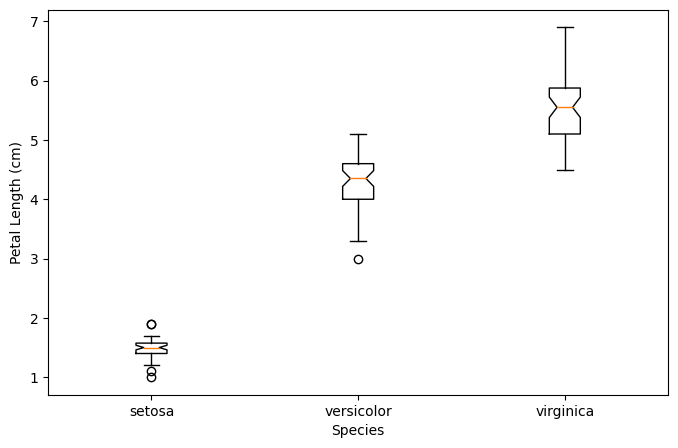

In [103]:
setosa = iris[iris.Species == 'setosa']
versicolor = iris[iris.Species == 'versicolor']
virginica = iris[iris.Species == 'virginica']

plot_box([setosa, versicolor, virginica], labels=['setosa', 'versicolor', 'virginica'])

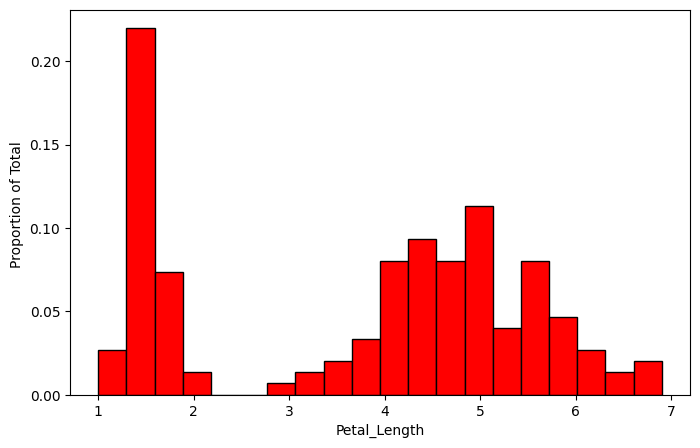

In [111]:
weights = np.ones_like(iris.Petal_Length) / iris.Petal_Length.count()
#print(weights)
plt.figure(figsize=(8,5))
plt.hist(iris.Petal_Length,
         bins = 20,
         weights = weights,
         facecolor = "red",
         edgecolor = "black",
         linewidth = 1)

plt.xlabel('Petal_Length')
plt.ylabel('Proportion of Total ')
plt.show ()